In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d sushilyadav1998/bollywood-celeb-localized-face-dataset

In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/bollywood-celeb-localized-face-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
!pip install mtcnn==0.1.0
!pip install tensorflow==2.3.1
!pip install keras==2.4.3
!pip install keras-vggface==0.6
!pip install keras_applications==1.0.8

In [ ]:
import os
import pickle

actors = os.listdir('/content/Bollywood_celeb_face_localized/bollywood_celeb_faces_0')

filenames = []

for actor in actors:
    for file in os.listdir(os.path.join('/content/Bollywood_celeb_face_localized/bollywood_celeb_faces_0',actor)):
        filenames.append(os.path.join('/content/Bollywood_celeb_face_localized/bollywood_celeb_faces_0',actor,file))

pickle.dump(filenames,open('filenames.pkl','wb'))

from tensorflow.keras.preprocessing import image
from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace
import numpy as np
import pickle
from tqdm import tqdm

filenames = pickle.load(open('filenames.pkl','rb'))

model = VGGFace(model='resnet50',include_top=False,input_shape=(224,224,3),pooling='avg')

def feature_extractor(img_path,model):
    img = image.load_img(img_path,target_size=(224,224))
    img_array = image.img_to_array(img)
    expanded_img = np.expand_dims(img_array,axis=0)
    preprocessed_img = preprocess_input(expanded_img)

    result = model.predict(preprocessed_img).flatten()

    return result

features = []

for file in tqdm(filenames):
    features.append(feature_extractor(file,model))

pickle.dump(features,open('embedding.pkl','wb'))

Text(0.5, 1.0, 'Aamir_Khan\npredicted Image')

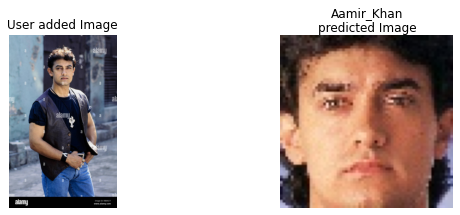

In [55]:
from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace
import numpy as np
import pickle
from sklearn.metrics.pairwise import cosine_similarity
import cv2
from mtcnn import MTCNN
from PIL import Image


feature_list = np.array(pickle.load(open('embedding.pkl','rb')))
filenames = pickle.load(open('filenames.pkl','rb'))

model = VGGFace(model='resnet50',include_top=False,input_shape=(224,224,3),pooling='avg')

detector = MTCNN()
# load img -> face detection
sample_img = cv2.imread('/content/4.jpg')

results = detector.detect_faces(sample_img)

x,y,width,height = results[0]['box']

face = sample_img[y:y+height,x:x+width]

#  extract its features
image = Image.fromarray(face)
image = image.resize((224,224))

face_array = np.asarray(image)

face_array = face_array.astype('float32')

expanded_img = np.expand_dims(face_array,axis=0)
preprocessed_img = preprocess_input(expanded_img)
result = model.predict(preprocessed_img).flatten()
#print(result)
#print(result.shape)
# find the cosine distance of current image with all the 8655 features
similarity = []
for i in range(len(feature_list)):
    similarity.append(cosine_similarity(result.reshape(1,-1),feature_list[i].reshape(1,-1))[0][0])

index_pos = sorted(list(enumerate(similarity)),reverse=True,key=lambda x:x[1])[0][0]


# recommend that image

# code for displaying multiple images in one figure

#import libraries
import cv2
from matplotlib import pyplot as plt

# create figure
fig = plt.figure(figsize=(10, 7))

# setting values to rows and column variables
rows = 2
columns = 2

# reading images
Image1 = cv2.imread('/content/4.jpg')
Image2 = cv2.imread(filenames[index_pos])

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(cv2.cvtColor(Image1, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("User added Image")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(cv2.cvtColor(Image2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(label=filenames[index_pos].split('/')[4]+"\n"+"predicted Image", 
          fontweight=10, 
          pad='2.0')

